## 摘要  

1. 概率图模型
2. 隐马尔可夫模型
3. 隐马尔可夫问题的解法概述  

注：这里学习的算法内容已经不完全属于《机器学习实战》中讲述的知识了，

**概率图模型**   

概率图模型，顾名思义就是用图的形式表达变量相关关系的概率模型。它以图为表现形式，最常见的就是用一个节点表示一个或一组随机变量，用节点之间的边表示变量间的关系。  

概率图模型主要有两种形式：  

1.有向图模型，如下图所示：  

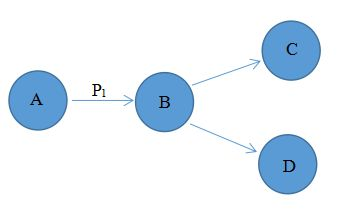


节点与节点之间是用有向的边联系起来的，它代表了一种因果关系， $P_1$表示从$A$变到$B$的概率为$P_1$。   


2.无向图模型，如下图所示：  

<img src="https://pic2.zhimg.com/80/v2-e81defb8ef8fe973a8b9057150525ec7_hd.jpg",width=300,height=300>


节点与节点之间是用无向的边联系起来的，它代表节点与节点之间的相关关系，无因果关系或者不知道因果关系。


## 隐马尔科夫模型  

隐马尔可夫模型（Hidden Markov Model，HMM），是一种有向图模型。

什么是马尔可夫模型呢？给大家举个例子：

现在有4个袋子，每个袋子里面有10个球，袋子里面的球情况如下：

<img src="https://pic2.zhimg.com/80/v2-677c999bfbf8491b1e16636647d35a8d_hd.jpg",width=400,height=400>


这时候我们从4个袋子中随机选一个袋子，从这个袋子中随机抽出一个球，记录其颜色，然后放回。然后从当前袋子随机转移到另外一个袋子，转移的规则是这样：如果当前袋子编号是1，那么下一个袋子一定是袋子2；如果当前的袋子是2或3，那么分别以0.4和0.6的概率转移到左边或右边的袋子；如果当前袋子是4，那么各以0.5的概率停留在袋子4或转移到袋子3。我们确定转移的袋子后，再从这个袋子中随机抽出一个球，记录其颜色，放回。上述过程重复5次，得到球的观测序列：

O=｛红，红，蓝，蓝，红｝

我们只能观测到球颜色的序列，但是具体是从哪个袋子中取出的我们并不知道。

所以我们就可以有如下定义，

**状态序列**：就是例子中所说的每次从哪个袋子中取出的球，状态序列一般情况下我们是不知道的。

**观测序列**：我们实际可以观测到的东西，就是例子中每次取出的球的颜色，观测序列一般情况下我们是知道的。

定义完了两个序列，下面我们就要开始定义隐马尔可夫模型中最重要的三个因素：

**1.状态转移概率矩阵A**

$A=[a_{ij}]_{N\times{N}}$

$a_{ij}$代表这一时刻状态为$i$，下一时刻状态转移到$j$的概率，在上面的例子中状态转移概率矩阵为：  

$
A=
\left( \begin{array}{ccc}
0 & 1 & 0 & 0 \\
0.4 & 0 & 0.6 & 0 \\
0 & 0.4 & 0 & 0.6\\
0 & 0 & 0.5 & 0.5 \end{array} \right)
$

**2.观测概率矩阵B**  

观测概率矩阵表示当处于某一状态时，生成具体观测的概率，在上面的例子中观测矩阵为：
$
B=
\left( \begin{array}{ccc}
0.5 & 0.5 \\
0.3 & 0.7 \\
0.6 & 0.4 \\
0.8 & 0.2 \end{array} \right)
$


**3.初始状态概率向量 $\pi$ **

初始状态转移概率向量表示最开始处于某一状态的概率，在例子中，由于一开始是随机选取了一个袋子，所以初始状态概率向量为：

$\pi=(0.25,0.25,0.25,0.25)^T $

隐马尔可夫模型 $\lambda$ 就是由上述三个要素决定，记作：

$\lambda=(A,B,\pi) $

状态转移矩阵A和初始状态概率向量 $\pi$ 决定了隐藏的马尔可夫链，生成了不可观测的状态序列；观测概率矩阵B确定了如何从状态生成观测，其与状态序列一起决定了如何产生观测序列。

有了上面的介绍，下面我们来规定一些符号：

设$Q$为所有可能的状态的集合，$V$是所有可能的观测的集合：

$
Q=\left\{ q_1,q_2,...,q_N \right\}, V=\left\{ v_1,v_2,...,v_M \right\} $

其中$N$是可能的状态数，$M$是可能的观测数。在例子中，$Q$和$V$分别为：

$Q$={袋子1，袋子2，袋子3，袋子4，袋子5}；$V$=｛红色，蓝色｝

定义 $i$ 为长度为T的状态序列，O为对应的观测序列：
$
I=\left\{ i_1,i_2,...,i_T \right\},O=\left\{ o_1,o_2,...,o_T\right\} 
$


在例子中，$O$对应为：

$
O$=｛红，红，蓝，蓝，红｝

定义完了上面的符号，我们引出隐马尔可夫模型的两个基本假设：

1. 齐次马尔可夫性假设，即假设隐藏的马尔可夫链在任意时刻t的状态只依赖于前一时刻的状态，与其他时刻的状态和观测无关。

2. 观测独立性假设，即假设任意时刻的观测只依赖于该时刻的状态，与其他状态及观测无关。

以上就是隐马尔可夫模型的原理内容，那这个模型主要是为了解决什么问题呢？



## 隐马尔可夫问题的解法概述    

### 1.基本问题

在实际应用中，人们比较关心隐马尔可夫模型的3个基本问题：  

1. 给定模型$\lambda=(A,B,\pi)$和观测序列$O=(o_1,o_2,\dots,o_T)$，计算在模型$\lambda$下观测序列$O$出现的概率$P(O|\lambda)$。换言之，如何评估模型和观测序列的匹配度问题？   

2. 已知观测序列 $O=(o_1,o_2,...o_T) $，估计模型 $\lambda=(A,B,\pi)$ 的参数，使得在该模型下观测序列概率$ P(O|\lambda)$ 最大。换言之，如何训练模型使其能最好地描述观测数据？    

3. 已知模型 $\lambda=(A,B,\pi)$ 和观测序列 $O=(o_1,o_2,...o_T)$  ，如何找到与此观测序列最匹配的状态序列$ I=(i_1,i_2,...i_T) $。换言之，如何根据观测序列推断出隐藏的状态序列？   

上述就是隐马尔可夫模型的3个基本问题。这三个基本问题在现实应用中十分广泛：   

对于第一个问题，比如说我们要根据以往的观测序列 $O=(o_1,o_2,...o_{T-1})$ 来推断出当前时刻最有可能的观测值$ o_T$ ，这就可以转化为第一个问题求解概率 $P(O|\lambda)$  。   

对于第二个问题，在大多数现实应用中，人工指定模型参数变得不太可行，如何根据训练样本学得最优的模型参数恰恰是第二个问题。     

对于问题三，比如说在语音识别任务中，观测值为语音信号，隐藏状态为文字，目标就是根据观测序列来找到最有可能的状态序列（即对应的文字），这是问题3。

那这3个问题具体应该怎么求解呢？

**2.问题求解**

**这里的问题求解部分只做简单介绍，大家对解法有个印象就行，可以跳过，想要深入了解的读者可自行查阅资料。**


2.1 问题1求解

对于问题1，计算观测序列概率 $P(O|\lambda)$ ，我们一般采用前向和后向算法。我在这里简要介绍前向算法。

我们首先定义前向概率：

$\alpha_t(i)=P(o_1,o_2,...,o_t,i_t=q_i|\lambda)$ 

它表示我们在给定模型参数$ \lambda$ 的条件下，到时刻$t$部分观测序列为 $(o_1,o_2,...,o_t)$ 且状态为 $q_i $的概率。

首先我们可以得到：

$\alpha_1(i)=\pi_ib_i(o_1) $

其中$ b_i(o_1)$ 表示隐藏状态为 $i $时，其观测状态为 $o_1 $的观测概率。

之后我们得到

$\alpha_2(i)=(\sum_{j=1}^{N}{\alpha_1(j)a_{ji}})b_i(o_2) $

其中 $a_{ji}$ 代表隐藏状态由 $j $转换为 $i $的状态转移概率。这样经过一步步递推可以得到：

$
\alpha_{t+1}(i)=(\sum_{j=1}^{N}{\alpha_t(j)a_{ji}})b_i(o_{t+1}),i=1,2,...N 
$

最终我们得到：   
$
P(O|\lambda)=\sum_{i=1}^{N}{\alpha_T(i)} 
$

以上就是前向算法的步骤，李航老师《统计学习方法》P177例10.2可以帮助大家理解，大家可以自行查阅。

2.2 问题2求解

对于问题2，我们假设有观测序列$O$，想要学得隐马尔可夫模型的参数 $\lambda=(A,B,\pi) $，这个参数估计问题可以由EM算法求得。EM算法我们将在下下次和大家一起学习。

2.3 问题3求解

问题3给定了观测序列$ O=(o_1,o_2,...o_T)$ 和模型参数 $\lambda=(A,B,\pi) $，想要得到与观测序列最匹配的状态序列。

解决这个问题主要用到维特比算法(Viterbi algorithm)，我简述一下这个算法的思路。定义： 


$
\delta_t(i)=maxP(i_t=i,i_{t-1},...i_1,o_t,...o_1|\lambda) 
$   


其代表时刻为t时，隐藏状态为 i 的所有单个路径中的最大值。这样得到,   


$
\delta_1(i)=\pi_ib_i(o_1) 
$
其表示在开始时刻$t=1$时，隐藏状态为 $i $，观测状态为$ o_1$ 的概率。其中 $b_i(o_1)$ 表示隐藏状态为$ i$ 时观测状态为$ o_1$ 的观测概率。

这样，可以得到：


$
\delta_2(i)=max\left[ \delta_1(j)a_{ji} \right]b_i(o_2),1\leq j\leq N 
$


当我们得到的 $\delta_2(i)$ 后，递归得到：


$
\delta_t(i)=max\left[ \delta_{t-1}(j)a_{ji} \right]b_i(o_t),1\leq j\leq N 
$


之后我们选择：   

$
P^*=max\delta_t(i),1\leq i\leq T 
$


这就是最优路径，这里求得的 $i$ 就是时刻为T时的最佳隐藏状态。之后我们根据最优路径往前倒推，就可以得到最佳的状态序列。

对这个算法想要深入了解的可以参照李航老师《统计学习方法》P185。



以上就是隐马尔可夫模型全部的原理内容，希望能给大家一些帮助。下一次我们一起学习概率图模型（2）：条件随机场。